In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_data.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
df.corr()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


# Wraggling

In [ ]:
df['Revenue_per_age'] = df['Revenue'] / df['Customer_Age']
df['Revenue_per_age'].head().round(2)

0    50.00
1    50.00
2    49.00
3    42.61
4     8.89
Name: Revenue_per_age, dtype: float64

In [ ]:
df['Calculated_Cost'] = df['Order_Quantity'] * df['Unit_Cost']
df['Calculated_Cost'].head()

0     360.0
1     360.0
2    1035.0
3     900.0
4     180.0
Name: Calculated_Cost, dtype: float64

In [ ]:
(df['Calculated_Cost'] != df['Cost']).sum()

1

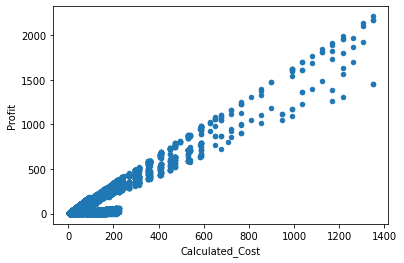

In [ ]:
df.plot(kind='scatter', x='Calculated_Cost', y='Profit')

In [ ]:
df['Calculated_Revenue'] = df['Cost'] + df['Profit']
df['Calculated_Revenue'].head()

0     950.0
1     950.0
2    2401.0
3    2088.0
4     418.0
Name: Calculated_Revenue, dtype: float64

In [ ]:
(df['Calculated_Revenue'] != df['Revenue']).sum()

1

In [ ]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,50.000000,360.0,950.0
1,2015-11-26,26,November,2015,19.0,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,50.000000,360.0,950.0
2,2014-03-23,23,March,2014,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0,49.000000,1035.0,2401.0
3,2016-03-23,23,March,2016,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0,42.612245,900.0,2088.0
4,2014-05-15,15,May,2014,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0,8.893617,180.0,418.0


# Filter

In [ ]:
df.loc[df['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40.0,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1.0,45.0,120.0,63.0,45.0,108.0,2.7,45.0,108.0
157,2015-11-04,4,November,2015,40.0,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1.0,45.0,120.0,63.0,45.0,108.0,2.7,45.0,108.0


In [ ]:
df.loc[df['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

141.1963624115864

In [ ]:
df.loc[ df.index==len(df['Country'])-1, ['Country', 'Cost']]

,Country,Cost
113035,France,552


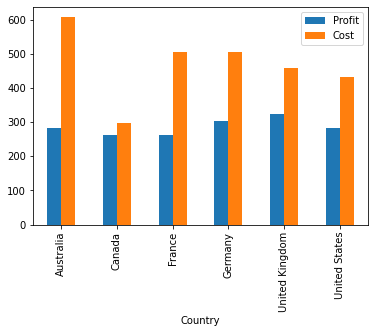

In [ ]:
y = df.groupby('Country')[['Profit', 'Cost']].mean()
y.plot.bar()

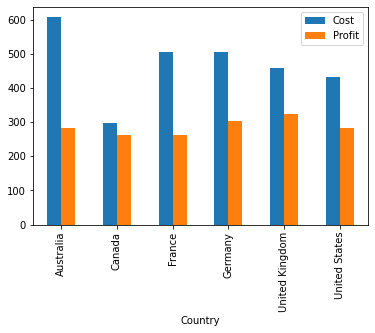

In [ ]:
y = df.groupby('Country').agg({'Cost': 'mean', 'Profit':'mean'})
y.plot.bar()

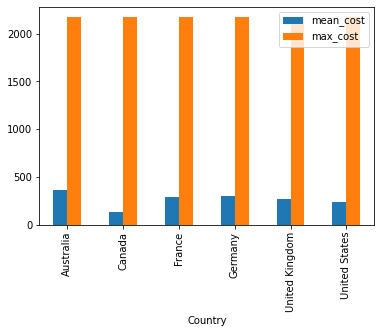

In [ ]:
y = df.groupby('Country').agg(mean_cost=('Unit_Cost', 'mean'), max_cost=('Unit_Cost', 'max'))
y.plot.bar()

#Numpy

In [ ]:
a = np.array([1,2,3, 6])
a

array([1, 2, 3, 6])